In [1]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [4]:
import pandas as pd

# Load processed test data
X_test = pd.read_csv(r"E:\My_Projects\Data_Science_Projects\Employee Performance_Analysis\Data\X_test.csv")
y_test = pd.read_csv(r"E:\My_Projects\Data_Science_Projects\Employee Performance_Analysis\Data\y_test.csv")

# Ensure y_test is correctly formatted
y_test = y_test.squeeze()  # Convert from DataFrame to Series if necessary


In [9]:
# Load saved models
stacking_model = joblib.load("E:/My_Projects/Data_Science_Projects/Employee Performance_Analysis/src/models/final_model_stacking.pkl")
#blend_ensemble = joblib.load("E:/My_Project/Data_Science_Projects/Employee Performance_Analysis/src/models/blend_ensemble.pkl")

voting_clf = joblib.load("E:/My_Projects/Data_Science_Projects/Employee Performance_Analysis/src/models/voting_clf.pkl")


In [10]:
# Generate predictions
models = {
    
    "voting_clf": voting_clf,
    "Stacking (Final Model)": stacking_model
}

y_preds = {name: model.predict(X_test) for name, model in models.items()}


In [11]:
for name, y_pred in y_preds.items():
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))
    print("-" * 80)


Classification Report for voting_clf:

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        36
           1       0.96      0.94      0.95       167
           2       0.81      0.81      0.81        21

    accuracy                           0.92       224
   macro avg       0.86      0.88      0.87       224
weighted avg       0.92      0.92      0.92       224

--------------------------------------------------------------------------------
Classification Report for Stacking (Final Model):

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        36
           1       0.96      0.96      0.96       167
           2       0.89      0.81      0.85        21

    accuracy                           0.93       224
   macro avg       0.89      0.89      0.89       224
weighted avg       0.93      0.93      0.93       224

-------------------------------------------------------------------

C:\Users\user\AppData\Local\Temp\ipykernel_21332\3808572311.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")


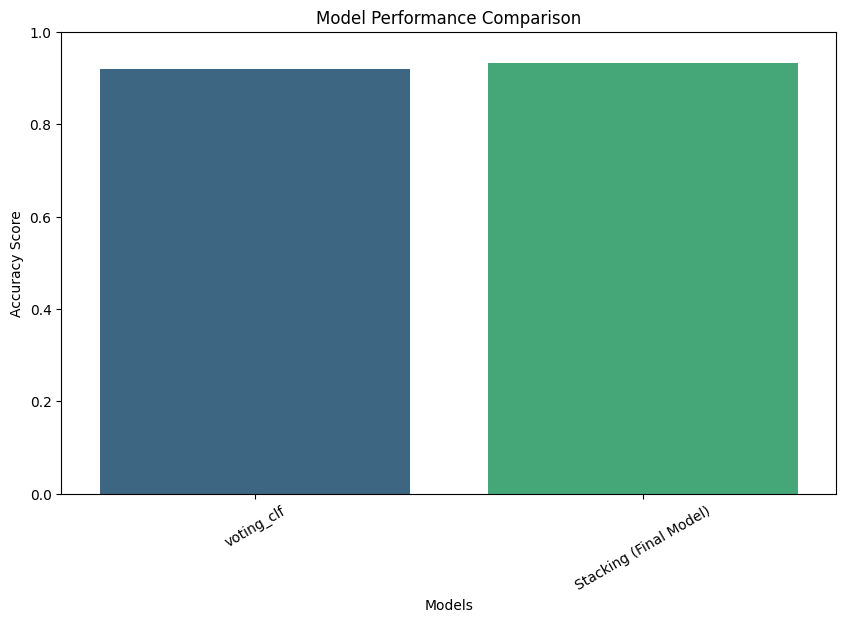

In [12]:
accuracies = {name: accuracy_score(y_test, y_pred) for name, y_pred in y_preds.items()}

# Plot comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.show()


In [16]:
# Generate both class labels and probabilities for visualization
y_preds = {name: model.predict(X_test) for name, model in models.items()}
y_pred_probs = {name: model.predict_proba(X_test) for name, model in models.items()}  # Needed for ROC & PR curves


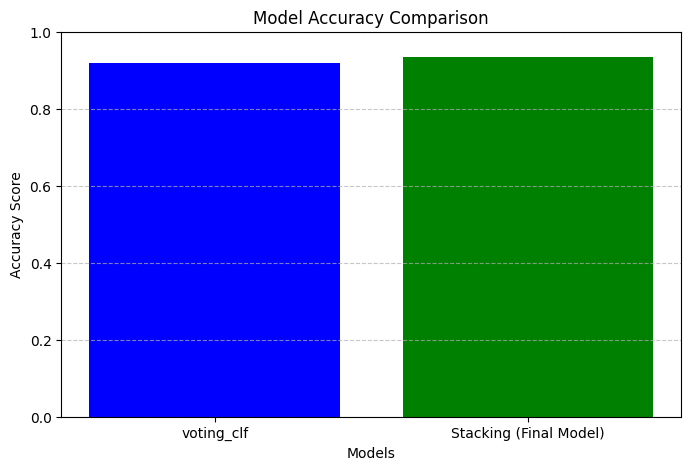

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Compute accuracies
accuracies = {name: accuracy_score(y_test, y_pred) for name, y_pred in y_preds.items()}

# Plot accuracy comparison
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green'])
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


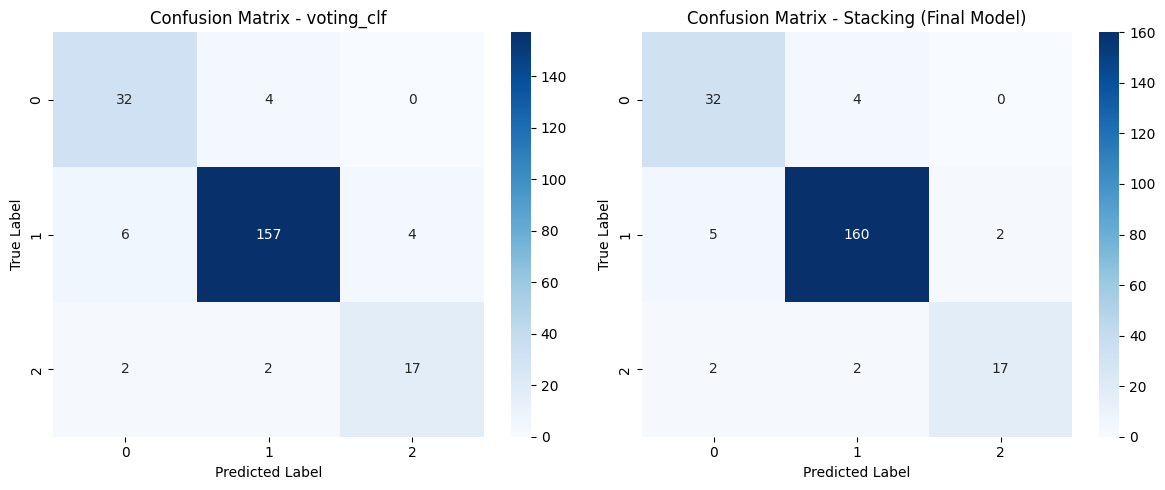

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

fig, axes = plt.subplots(1, len(models), figsize=(12, 5))

for ax, (name, y_pred) in zip(axes, y_preds.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", ax=ax)
    ax.set_title(f"Confusion Matrix - {name}")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

plt.tight_layout()
plt.show()


In [19]:
from sklearn.metrics import classification_report

for name, y_pred in y_preds.items():
    print(f"📌 Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))
    print("-" * 60)


📌 Classification Report for voting_clf:

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        36
           1       0.96      0.94      0.95       167
           2       0.81      0.81      0.81        21

    accuracy                           0.92       224
   macro avg       0.86      0.88      0.87       224
weighted avg       0.92      0.92      0.92       224

------------------------------------------------------------
📌 Classification Report for Stacking (Final Model):

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        36
           1       0.96      0.96      0.96       167
           2       0.89      0.81      0.85        21

    accuracy                           0.93       224
   macro avg       0.89      0.89      0.89       224
weighted avg       0.93      0.93      0.93       224

------------------------------------------------------------


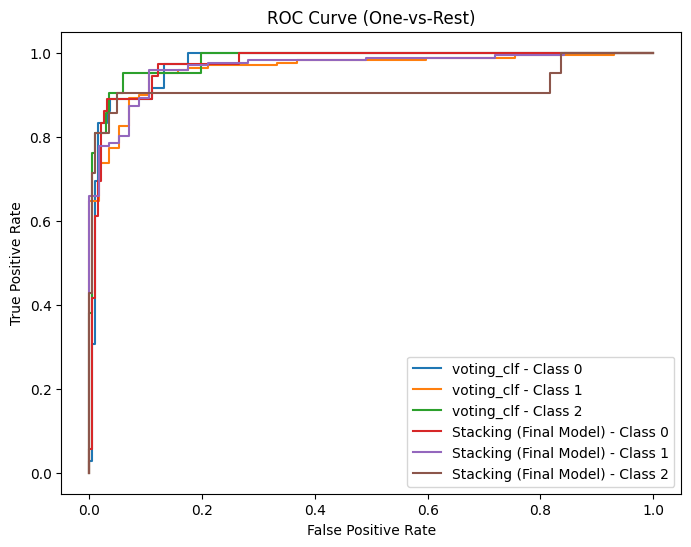

In [20]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize labels for multiclass ROC (One-vs-Rest)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

plt.figure(figsize=(8, 6))

for name, y_prob in y_pred_probs.items():
    for i in range(y_test_bin.shape[1]):  # Loop through each class
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        plt.plot(fpr, tpr, label=f"{name} - Class {i}")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (One-vs-Rest)")
plt.legend()
plt.show()


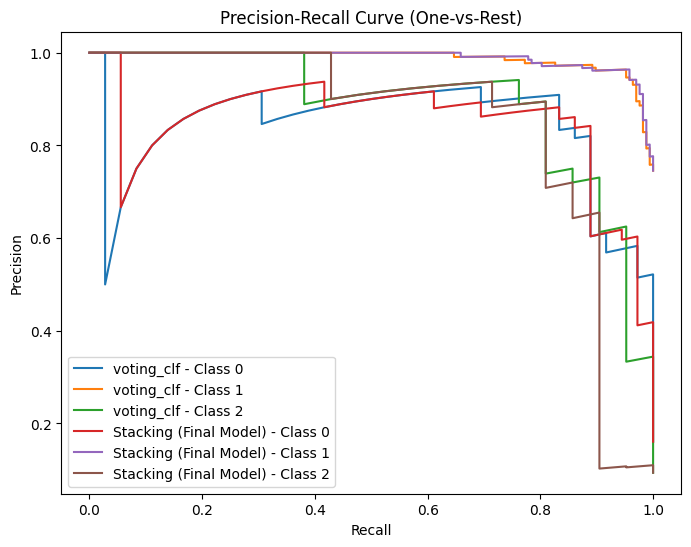

In [21]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(8, 6))

for name, y_prob in y_pred_probs.items():
    for i in range(y_test_bin.shape[1]):  # Loop through each class
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
        plt.plot(recall, precision, label=f"{name} - Class {i}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (One-vs-Rest)")
plt.legend()
plt.show()


In [23]:
data_clean = pd.read_csv("E:\My_Projects\Data_Science_Projects\Employee Performance_Analysis\Data\processed")

Department-wise Performance Summary:
   EmpDepartment  PerformanceRating  Attrition  EmpEnvironmentSatisfaction
0              0           3.052632        0.0                    2.894737
1              1           3.087379        0.0                    2.686084
2              2           2.791667        0.0                    2.854167
3              3           2.941176        0.0                    2.627451
4              4           2.913174        0.0                    2.763473
5              5           2.862745        0.0                    2.661064


C:\Users\user\AppData\Local\Temp\ipykernel_21332\1326685227.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dept_summary, x='EmpDepartment', y='PerformanceRating', palette='viridis')


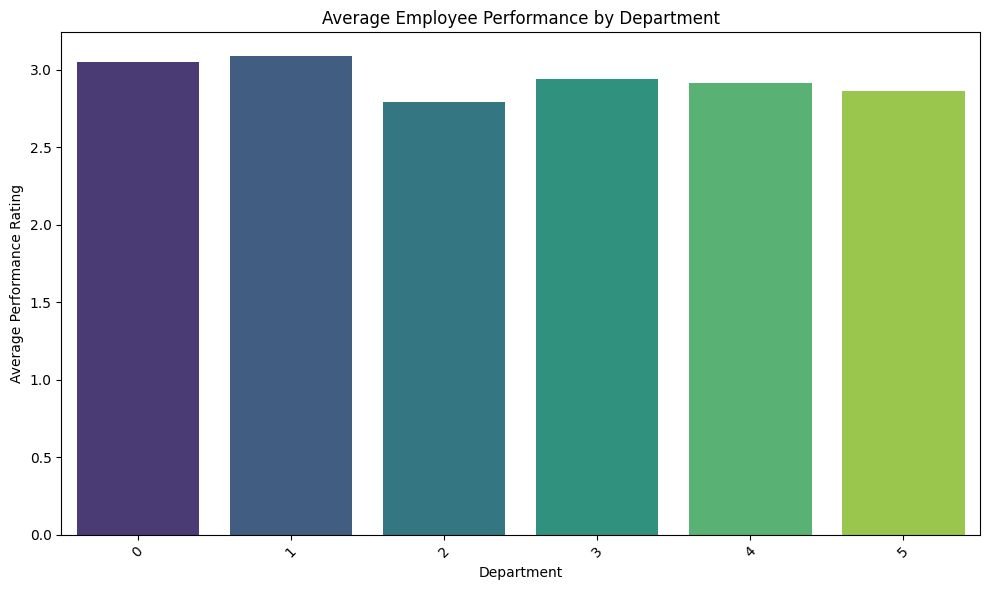

In [24]:
# Assuming 'EmpDepartment' is a column in your original data_clean dataset
dept_summary = data_clean.groupby('EmpDepartment').agg({
    'PerformanceRating': 'mean',
    'Attrition': lambda x: (x=='Yes').mean(),  # or another indicator of turnover
    'EmpEnvironmentSatisfaction': 'mean'
}).reset_index()

print("Department-wise Performance Summary:")
print(dept_summary)

# Visualize the average performance rating by department
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=dept_summary, x='EmpDepartment', y='PerformanceRating', palette='viridis')
plt.title("Average Employee Performance by Department")
plt.xlabel("Department")
plt.ylabel("Average Performance Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[5=Sales, 3=Human Resources, 1=Development, 0=Data Science, 4=Research & Development, 2=Finance]
